## Data Visualization or EDA
In this notebook I will walk you through data visualization on the Titanic dataset.

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data. We will be using the Seaborn Library.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib  import pyplot as plt

In [2]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Categorical and numerical columns

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


sex,embarked,class,deck,embark_town,alive, alone are categorical variables.
Survived can be considered as categorical, here 1 means survived and 0 means not survived

## Identifying the null values (missing values)¶
First we will check for null values in the data using heatmap with the isnull() method



<AxesSubplot:>

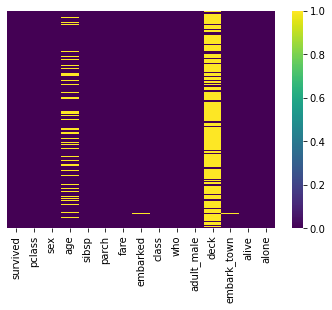

In [4]:
sns.heatmap(titanic.isna(),yticklabels=False,cmap='viridis')

There are null/missing values in age and maximum null/missing values are there in deck column, and very few null values in embarked and embark_town column,
Now lets check the numbers

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Survival of Male and Female
here will we will check for the number of male and female survived ,using count plot.

<AxesSubplot:xlabel='sex', ylabel='count'>

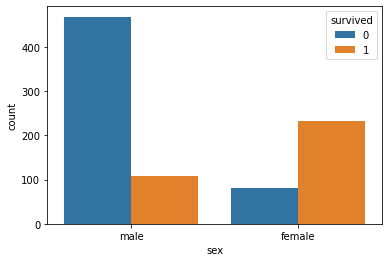

In [6]:
sns.countplot(data=titanic,x='sex',hue='survived')


In the overall number of passengers who survived, the majority were females.

In [7]:
data=titanic.groupby(['sex','survived']).agg({'survived':'size'})
data=data.unstack(level=-1)
data=data.reset_index()

In [8]:
data.columns = data.columns.droplevel(0)

In [9]:
data.columns=['sex',0,1]
data

,sex,0,1
0,female,81,233
1,male,468,109


In [10]:
data['survival_rate']=round((data[1]/(data[0]+data[1]))*100,2)
data

,sex,0,1,survival_rate
0,female,81,233,74.20
1,male,468,109,18.89


It can be approximated that the survival rate of men is around 19% and that of women is around 74%.

<AxesSubplot:xlabel='age', ylabel='Count'>

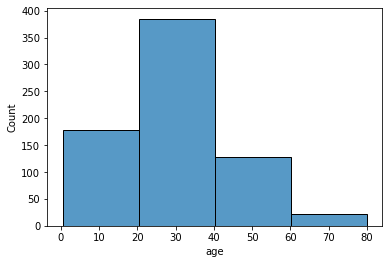

In [11]:
sns.histplot(data=titanic,x='age',bins=4)

The number of passengers in the age bracket [20,40] is higher than other age brackets.

<AxesSubplot:xlabel='age', ylabel='Count'>

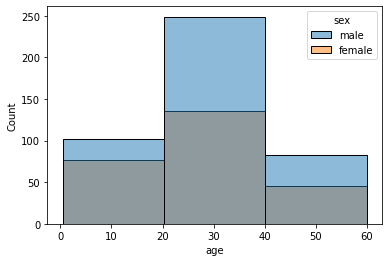

In [12]:
sns.histplot(data=titanic[titanic.age<=60],x='age',bins=3,hue='sex')

The survival number of women in the age range [20, 40] is comparatively higher than in other age brackets. Consider only those women whose age is between 0 and 60.

## Referring to the 'titanic' dataset, what can you infer about how the age of the passengers and whether they were alone or not affects the chances of their survival?

In [18]:
titanic[titanic.survived==0].age.median()

28.0

In [27]:
titanic[titanic.survived==1].age.median()

28.0

In [28]:
titanic[(titanic.survived==1) & (titanic.alone==True)].age.median()

30.0

In [30]:
titanic[(titanic.survived==0) & (titanic.alone==True)].age.median()

29.0

In [26]:
titanic[(titanic.survived==1) & (titanic.alone==False)].age.median()

24.0

In [29]:
titanic[(titanic.survived==0) & (titanic.alone==False)].age.median()

27.0

People who were alone and survived (age=30) were found to have a higher median age than those who did not survive(age=29).

People who were alone and did not survive(age=29) were found to have lowe median age than those who survived(age=30).

People who were not alone and did not survive (age=27) were found to have higher median age than those who did survive(age=24).

People who were not alone and survived(age=24) were found to have lower median age than those who did not survive(age=27).

## For the Titanic dataset, what can you say about the impact of fare on the survival dependency differently for all the classes?

It is observed that the number of passengers from class "Third" who survived was way lesser than those who didn't survive in that class.


In [31]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='class', ylabel='count'>

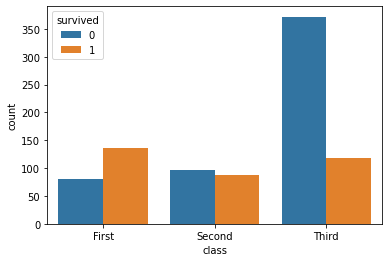

In [32]:
sns.countplot(data=titanic,x='class',hue='survived')

In [38]:
titanic.groupby('class')['fare'].agg(fare_mean='mean', fare_median='median')

,fare_mean,fare_median
class,,
First,84.154687,60.2875
Second,20.662183,14.2500
Third,13.675550,8.0500


In [40]:
titanic.groupby('class')['fare'].agg(fare_mean='mean', fare_median='median').reset_index()

,class,fare_mean,fare_median
0,First,84.154687,60.2875
1,Second,20.662183,14.2500
2,Third,13.675550,8.0500


Alternative method to do the same activity is following:

In [39]:
titanic.groupby('class').agg({'fare':['mean','median']})

fare         
             mean   median
class                     
First   84.154687  60.2875
Second  20.662183  14.2500
Third   13.675550   8.0500

In [43]:
result=titanic.groupby('class').agg({'fare':['mean','median']})
result.columns=result.columns.droplevelevel(level=0)

In [44]:
result

,mean,median
class,,
First,84.154687,60.2875
Second,20.662183,14.2500
Third,13.675550,8.0500


In [45]:
result.reset_index()

,class,mean,median
0,First,84.154687,60.2875
1,Second,20.662183,14.2500
2,Third,13.675550,8.0500


In [51]:
data=titanic.groupby(['class','survived'])['fare'].agg('mean')
data

class   survived
First   0           64.684007
        1           95.608029
Second  0           19.412328
        1           22.055700
Third   0           13.669364
        1           13.694887
Name: fare, dtype: float64

In [56]:
data2=data.unstack(level=-1).reset_index()
data2

survived,class,0,1
0,First,64.684007,95.608029
1,Second,19.412328,22.055700
2,Third,13.669364,13.694887


In [62]:
data2 = data2.rename_axis(None, axis=1)

In [63]:
data2

,class,0,1
0,First,64.684007,95.608029
1,Second,19.412328,22.055700
2,Third,13.669364,13.694887


The greater mean fare for class, survived category: who paid more survived with more chances in general for all classes.

survived
0    0.714286
1    0.285714
dtype: float64


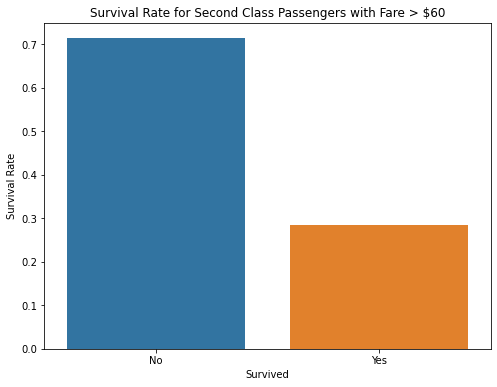

In [49]:


# Filter data for Second class and fare > 60
second_class_high_fare = titanic[(titanic['class'] == 'Second') & (titanic['fare'] > 60)]

# Calculate survival rate
survival_rate = second_class_high_fare.groupby('survived').size() / len(second_class_high_fare)
print(survival_rate)
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('Survival Rate for Second Class Passengers with Fare > $60')
plt.xlabel('Survived')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In the class "Second", it is found that people who paid higher amount of fare (i.e. >60) haven't survived dominantly in that fare range.

##  Correlation between different variables

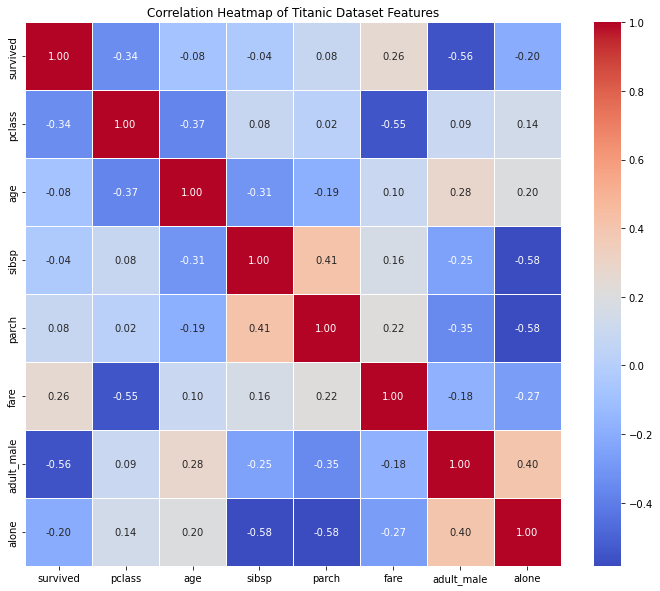

In [66]:

# Calculate the correlation matrix
correlation_matrix = titanic.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.show()


From the above heatmap, Identify which of the following is correct?

a. features pclass and fare are negatively correlated.

b. features alone and adult_male are weakly positively correlated.

c. Diagonal features are showing the correlation between themselves and therefore it is 1.